In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import zscore

# 
# Analyse pré-exploratoire du jeu de données
# 


   ## Étape 1 : Le Nettoyage de Données
   ## 

### 1) Les différents fichiers

#### EdStatsData

In [2]:
df1 = pd.read_csv('EdStatsData.csv', sep =',')

In [3]:
df1.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df1.loc[:, "Country Name"]

0         Arab World
1         Arab World
2         Arab World
3         Arab World
4         Arab World
             ...    
886925      Zimbabwe
886926      Zimbabwe
886927      Zimbabwe
886928      Zimbabwe
886929      Zimbabwe
Name: Country Name, Length: 886930, dtype: object

In [5]:
df1.shape

(886930, 70)

In [6]:
df1.loc[0]

Country Name                                             Arab World
Country Code                                                    ARB
Indicator Name    Adjusted net enrolment rate, lower secondary, ...
Indicator Code                                           UIS.NERA.2
1970                                                            NaN
                                        ...                        
2085                                                            NaN
2090                                                            NaN
2095                                                            NaN
2100                                                            NaN
Unnamed: 69                                                     NaN
Name: 0, Length: 70, dtype: object

In [7]:
df1.info('Country Name')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   1970            72288 non-null   float64
 5   1971            35537 non-null   float64
 6   1972            35619 non-null   float64
 7   1973            35545 non-null   float64
 8   1974            35730 non-null   float64
 9   1975            87306 non-null   float64
 10  1976            37483 non-null   float64
 11  1977            37574 non-null   float64
 12  1978            37576 non-null   float64
 13  1979            36809 non-null   float64
 14  1980            89122 non-null   float64
 15  1981            38777 non-null   float64
 16  1982            37511 non-null   float64
 17  1983      

In [8]:
df1['Indicator Name'].unique

<bound method Series.unique of 0         Adjusted net enrolment rate, lower secondary, ...
1         Adjusted net enrolment rate, lower secondary, ...
2         Adjusted net enrolment rate, lower secondary, ...
3         Adjusted net enrolment rate, lower secondary, ...
4         Adjusted net enrolment rate, primary, both sex...
                                ...                        
886925    Youth illiterate population, 15-24 years, male...
886926    Youth literacy rate, population 15-24 years, b...
886927    Youth literacy rate, population 15-24 years, f...
886928    Youth literacy rate, population 15-24 years, g...
886929    Youth literacy rate, population 15-24 years, m...
Name: Indicator Name, Length: 886930, dtype: object>

#### EdStatsCountry

In [9]:
df2 = pd.read_csv('EdStatsCountry.csv', sep=',')

In [10]:
df2.head(10)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period fo...,South Asia,Low income,AF,...,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data,...",Sub-Saharan Africa,Upper middle income,AO,...,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,...,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09",Living Standards Measurement Study Survey (LSM...,Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,...,NaN,2011. Population figures compiled from adminis...,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN
5,ARB,Arab World,Arab World,Arab World,1A,NaN,Arab World aggregate. Arab World is composed o...,NaN,NaN,1A,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ARE,United Arab Emirates,United Arab Emirates,United Arab Emirates,AE,U.A.E. dirham,April 2013 database update: Based on data from...,Middle East & North Africa,High income: nonOECD,AE,...,General Data Dissemination System (GDDS),2010,NaN,NaN,NaN,2012,NaN,2011.0,2005,NaN
7,ARG,Argentina,Argentina,Argentine Republic,AR,Argentine peso,NaN,Latin America & Caribbean,Upper middle income,AR,...,Special Data Dissemination Standard (SDDS),2010,"Multiple Indicator Cluster Survey (MICS), 2011/12","Integrated household survey (IHS), 2012",Yes,2013,2002.0,2012.0,2000,NaN
8,ARM,Armenia,Armenia,Republic of Armenia,AM,Armenian dram,NaN,Europe & Central Asia,Lower middle income,AM,...,Special Data Dissemination Standard (SDDS),2011,"Demographic and Health Survey (DHS), 2010","Integrated household survey (IHS), 2012",Yes,2013/14,NaN,2012.0,2007,NaN
9,ASM,American Samoa,American Samoa,American Samoa,AS,U.S. dollar,NaN,East Asia & Pacific,Upper middle income,AS,...,NaN,2010,NaN,NaN,Yes,2007,NaN,NaN,NaN,NaN


In [11]:
df2.shape

(241, 32)

In [12]:
df2.iloc[:,1]

0             Aruba
1       Afghanistan
2            Angola
3           Albania
4           Andorra
           ...     
236          Kosovo
237           Yemen
238    South Africa
239          Zambia
240        Zimbabwe
Name: Short Name, Length: 241, dtype: object

In [13]:
df2.info('Country Code')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [14]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 32 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country Code                                       241 non-null    object 
 1   Short Name                                         241 non-null    object 
 2   Table Name                                         241 non-null    object 
 3   Long Name                                          241 non-null    object 
 4   2-alpha code                                       238 non-null    object 
 5   Currency Unit                                      215 non-null    object 
 6   Special Notes                                      145 non-null    object 
 7   Region                                             214 non-null    object 
 8   Income Group                                       214 non-null    object 
 9   WB-2 code 

In [15]:
df2.loc[0]

Country Code                                                                                       ABW
Short Name                                                                                       Aruba
Table Name                                                                                       Aruba
Long Name                                                                                        Aruba
2-alpha code                                                                                        AW
Currency Unit                                                                            Aruban florin
Special Notes                                        SNA data for 2000-2011 are updated from offici...
Region                                                                       Latin America & Caribbean
Income Group                                                                      High income: nonOECD
WB-2 code                                                                

### 
### 2) Merge "EdStatsCountry" avec "EdStatsData"

In [16]:
df5 = pd.merge(df1, df2, on='Country Code', how='outer')

In [17]:
df5.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df5.shape

(886930, 101)

In [19]:
df5.info('Country Name')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886930 entries, 0 to 886929
Data columns (total 101 columns):
 #    Column                                             Dtype  
---   ------                                             -----  
 0    Country Name                                       object 
 1    Country Code                                       object 
 2    Indicator Name                                     object 
 3    Indicator Code                                     object 
 4    1970                                               float64
 5    1971                                               float64
 6    1972                                               float64
 7    1973                                               float64
 8    1974                                               float64
 9    1975                                               float64
 10   1976                                               float64
 11   1977                                 

### 3) Filtrage

In [20]:
# On supprime ici les années de 1970 à 2009

df5.drop(df5.iloc[:, 4:44], axis = 1, inplace = True)


In [21]:
df5.info('Country Name')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886930 entries, 0 to 886929
Data columns (total 61 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Country Name                                       886930 non-null  object 
 1   Country Code                                       886930 non-null  object 
 2   Indicator Name                                     886930 non-null  object 
 3   Indicator Code                                     886930 non-null  object 
 4   2010                                               242442 non-null  float64
 5   2011                                               146012 non-null  float64
 6   2012                                               147264 non-null  float64
 7   2013                                               137509 non-null  float64
 8   2014                                               113789 non-null  float6

In [22]:
# On supprime ensuite les années futures et on se focalise sur les données des dernières années

df5.drop(df5.iloc[:, 13:30], axis = 1, inplace = True)


In [23]:
df5.info('Country Name')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886930 entries, 0 to 886929
Data columns (total 44 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Country Name                                       886930 non-null  object 
 1   Country Code                                       886930 non-null  object 
 2   Indicator Name                                     886930 non-null  object 
 3   Indicator Code                                     886930 non-null  object 
 4   2010                                               242442 non-null  float64
 5   2011                                               146012 non-null  float64
 6   2012                                               147264 non-null  float64
 7   2013                                               137509 non-null  float64
 8   2014                                               113789 non-null  float6

In [24]:
# On supprime ensuite les indicateurs qui ne nous intéressent pas

df5.drop(df5.iloc[:, 14:19], axis = 1, inplace = True)


In [25]:
df5.info('Country Name')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886930 entries, 0 to 886929
Data columns (total 39 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   Country Name                                       886930 non-null  object 
 1   Country Code                                       886930 non-null  object 
 2   Indicator Name                                     886930 non-null  object 
 3   Indicator Code                                     886930 non-null  object 
 4   2010                                               242442 non-null  float64
 5   2011                                               146012 non-null  float64
 6   2012                                               147264 non-null  float64
 7   2013                                               137509 non-null  float64
 8   2014                                               113789 non-null  float6

In [26]:
# On supprime la suite des indicateurs qui ne nous intéressent pas (suite)

df5.drop(df5.iloc[:, 16:39], axis = 1, inplace = True)


In [27]:
df5.info('Country Name')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 886930 entries, 0 to 886929
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Country Name    886930 non-null  object 
 1   Country Code    886930 non-null  object 
 2   Indicator Name  886930 non-null  object 
 3   Indicator Code  886930 non-null  object 
 4   2010            242442 non-null  float64
 5   2011            146012 non-null  float64
 6   2012            147264 non-null  float64
 7   2013            137509 non-null  float64
 8   2014            113789 non-null  float64
 9   2015            131058 non-null  float64
 10  2016            16460 non-null   float64
 11  2017            143 non-null     float64
 12  2020            51436 non-null   float64
 13  Short Name      883265 non-null  object 
 14  Region          784310 non-null  object 
 15  Income Group    784310 non-null  object 
dtypes: float64(9), object(7)
memory usage: 115.0+ MB


In [28]:
# Aperçu des sommes des données manquantes pour chaque colonne

df5.isnull().sum()


Country Name           0
Country Code           0
Indicator Name         0
Indicator Code         0
2010              644488
2011              740918
2012              739666
2013              749421
2014              773141
2015              755872
2016              870470
2017              886787
2020              835494
Short Name          3665
Region            102620
Income Group      102620
dtype: int64

### 4) Visualisation du remplissage des données du DataFrame (heatmap)

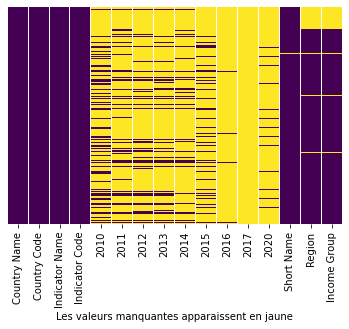

In [29]:
# Remplissage des données (par colonne) du DataFrame avec seaborn

sns.heatmap(df5.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.xlabel('Les valeurs manquantes apparaissent en jaune')
plt.show()

# Les valeurs manquantes du DataFrame sont en jaune


In [30]:
# Suppression des variables pour les années 2016, 2017, 2020

df5.drop(['2016', '2017', '2020'], axis = 1, inplace = True)
df5


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,Arab World,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,Arab World,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,166679.00000,NaN,NaN,199464.000000,NaN,Zimbabwe,Sub-Saharan Africa,Low income
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,90.93070,NaN,NaN,90.428120,NaN,Zimbabwe,Sub-Saharan Africa,Low income
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,92.12456,NaN,NaN,93.188350,NaN,Zimbabwe,Sub-Saharan Africa,Low income
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,1.02828,NaN,NaN,1.063890,NaN,Zimbabwe,Sub-Saharan Africa,Low income


In [31]:

# Création d'une colonne indiquant le taux de remplissage (en %) par ligne

df5['NB_NAN'] = df5.isna().mean(axis=1)
df5['NB_NAN'] = (1-df5['NB_NAN'])*100



In [32]:

# On supprime toutes les lignes ayant des valeurs manquantes dans 'Region' et 'Income Group'

df5 = df5.dropna(axis = 0, how = 'any', subset = ['Region','Income Group'])
df5


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN
91625,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,47.436790,50.627232,NaN,Afghanistan,South Asia,Low income,69.230769
91626,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,34.073261,37.641541,NaN,Afghanistan,South Asia,Low income,69.230769
91627,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,0.567060,0.598370,NaN,Afghanistan,South Asia,Low income,69.230769
91628,Afghanistan,AFG,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,60.087059,62.906952,NaN,Afghanistan,South Asia,Low income,69.230769
91629,Afghanistan,AFG,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,Afghanistan,South Asia,Low income,53.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886925,Zimbabwe,ZWE,"Youth illiterate population, 15-24 years, male...",UIS.LP.AG15T24.M,NaN,166679.00000,NaN,NaN,199464.000000,NaN,Zimbabwe,Sub-Saharan Africa,Low income,69.230769
886926,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, b...",SE.ADT.1524.LT.ZS,NaN,90.93070,NaN,NaN,90.428120,NaN,Zimbabwe,Sub-Saharan Africa,Low income,69.230769
886927,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, f...",SE.ADT.1524.LT.FE.ZS,NaN,92.12456,NaN,NaN,93.188350,NaN,Zimbabwe,Sub-Saharan Africa,Low income,69.230769
886928,Zimbabwe,ZWE,"Youth literacy rate, population 15-24 years, g...",SE.ADT.1524.LT.FM.ZS,NaN,1.02828,NaN,NaN,1.063890,NaN,Zimbabwe,Sub-Saharan Africa,Low income,69.230769


In [33]:

# Trie des valeurs manquantes

df6 = df5.sort_values('NB_NAN')
df6


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN
397995,Haiti,HTI,PIAAC: Young adults by numeracy proficiency le...,LO.PIAAC.NUM.YOU.3,NaN,NaN,NaN,NaN,NaN,NaN,Haiti,Latin America & Caribbean,Low income,53.846154
632653,Oman,OMN,PISA: Female 15-year-olds by science proficien...,LO.PISA.SCI.5.FE,NaN,NaN,NaN,NaN,NaN,NaN,Oman,Middle East & North Africa,High income: nonOECD,53.846154
632654,Oman,OMN,PISA: Female 15-year-olds by science proficien...,LO.PISA.SCI.6.FE,NaN,NaN,NaN,NaN,NaN,NaN,Oman,Middle East & North Africa,High income: nonOECD,53.846154
632655,Oman,OMN,PISA: Male 15-year-olds by mathematics profici...,LO.PISA.MAT.0.MA,NaN,NaN,NaN,NaN,NaN,NaN,Oman,Middle East & North Africa,High income: nonOECD,53.846154
632656,Oman,OMN,PISA: Male 15-year-olds by mathematics profici...,LO.PISA.MAT.1.MA,NaN,NaN,NaN,NaN,NaN,NaN,Oman,Middle East & North Africa,High income: nonOECD,53.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
818611,Turkey,TUR,"Gross enrolment ratio, pre-primary, female (%)",SE.PRE.ENRR.FE,24.930340,28.431959,29.668640,26.956890,26.086639,28.082291,Turkey,Europe & Central Asia,Upper middle income,100.000000
744002,Spain,ESP,"Adjusted net enrolment rate, primary, male (%)",SE.PRM.TENR.MA,99.389603,99.519417,99.496719,99.300888,98.820869,99.354927,Spain,Europe & Central Asia,High income: OECD,100.000000
672745,Qatar,QAT,Percentage of students in tertiary education w...,SE.TER.ENRL.FE.ZS,63.000141,64.187080,65.139580,63.687691,64.331818,65.976463,Qatar,Middle East & North Africa,High income: nonOECD,100.000000
269584,Croatia,HRV,Percentage of students in secondary general ed...,SE.SEC.ENRL.GC.FE.ZS,51.468399,51.565948,51.588291,51.523281,51.693218,51.804482,Croatia,Europe & Central Asia,High income: nonOECD,100.000000


### 5) Pour le choix des indicateurs


#### On regroupe et on compte les occurences des indicateurs (modalités) pour chaque année



In [34]:

df7 = df6.groupby('Indicator Name')['2010'].count() + df5.groupby('Indicator Name')['2011'].count() + df5.groupby('Indicator Name')['2012'].count() + df5.groupby('Indicator Name')['2013'].count() + df5.groupby('Indicator Name')['2014'].count() + df5.groupby('Indicator Name')['2015'].count()


In [35]:
df7

Indicator Name
Adjusted net enrolment rate, lower secondary, both sexes (%)               500
Adjusted net enrolment rate, lower secondary, female (%)                   493
Adjusted net enrolment rate, lower secondary, gender parity index (GPI)    493
Adjusted net enrolment rate, lower secondary, male (%)                     493
Adjusted net enrolment rate, primary, both sexes (%)                       767
                                                                          ... 
Youth illiterate population, 15-24 years, male (number)                    241
Youth literacy rate, population 15-24 years, both sexes (%)                242
Youth literacy rate, population 15-24 years, female (%)                    242
Youth literacy rate, population 15-24 years, gender parity index (GPI)     242
Youth literacy rate, population 15-24 years, male (%)                      242
Length: 3665, dtype: int64

In [36]:

# On trie les résultats obtenu

df8 = df7.sort_values(ascending=False)
df8


Indicator Name
Population, total                                                                                                        1272
Population growth (annual %)                                                                                             1271
Official entrance age to primary education (years)                                                                       1230
Theoretical duration of primary education (years)                                                                        1230
Theoretical duration of pre-primary education (years)                                                                    1212
                                                                                                                         ... 
EGRA: Identification of the Initial Sound of a Spoken Word - Share of students with a zero score (%). Bomu. 2nd Grade       0
EGRA: Reading Comprehension - Share of students with a zero score (%). Bamanankan. 2nd Grade           

In [37]:

# On affiche la tete de liste des résultats et on sélectionne les indices qui nous intéressent 

df8[0:50]

Indicator Name
Population, total                                                                              1272
Population growth (annual %)                                                                   1271
Official entrance age to primary education (years)                                             1230
Theoretical duration of primary education (years)                                              1230
Theoretical duration of pre-primary education (years)                                          1212
Theoretical duration of secondary education (years)                                            1210
Theoretical duration of lower secondary education (years)                                      1210
Theoretical duration of upper secondary education (years)                                      1210
Official entrance age to lower secondary education (years)                                     1210
Official entrance age to pre-primary education (years)                               

## 
## Étape 2 : Analyse des données
## 


### Les indicateurs
### 


#### 1. Les dépenses de l'état sur l'éducation
#### 

In [38]:

# Pour l'indice sur les dépense de l'état lié à l'éducation
# voici la moyenne du taux de remplissage (lignes)

Expenditure = df6.loc[df6['Indicator Name'] == 'Government expenditure on education as % of GDP (%)']
Expenditure['NB_NAN'].mean()


75.84471603163179

In [39]:

# Pour l'indice sur les dépense de l'état lié à l'éducation
# nous calculon la médiane pour chaque année parmis les années sélectionnées

Expenditure_r = Expenditure.median(axis=0)
Expenditure_r


2010       4.582380
2011       4.442940
2012       4.557860
2013       4.756995
2014       4.868460
2015       4.351550
NB_NAN    84.615385
dtype: float64

In [40]:

# Pour l'indice sur les dépense de l'état lié à l'éducation
# Nous remplissons les valeurs manquantes par la médiane pour chaque années

Expenditure_f = Expenditure.fillna(Expenditure_r)
Expenditure_f



,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN
426400,Iraq,IRQ,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,Iraq,Middle East & North Africa,Upper middle income,53.846154
433730,Isle of Man,IMN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,Isle of Man,Europe & Central Asia,High income: nonOECD,53.846154
785570,Syrian Arab Republic,SYR,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,Syrian Arab Republic,Middle East & North Africa,Lower middle income,53.846154
624310,Northern Mariana Islands,MNP,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,Northern Mariana Islands,East Asia & Pacific,High income: nonOECD,53.846154
466715,"Korea, Dem. People’s Rep.",PRK,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,Dem. People's Rep. Korea,East Asia & Pacific,Low income,53.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382420,Guatemala,GTM,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,2.80385,2.92023,2.95579,2.842910,2.94174,2.95595,Guatemala,Latin America & Caribbean,Lower middle income,100.000000
803895,Togo,TGO,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.42739,4.44294,4.73727,4.674320,4.86846,5.21790,Togo,Sub-Saharan Africa,Low income,100.000000
554675,Mauritius,MUS,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,3.55097,3.32852,3.41473,3.619650,4.91773,4.88539,Mauritius,Sub-Saharan Africa,Upper middle income,100.000000
756250,St. Lucia,LCA,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.13338,4.29573,4.03043,4.770220,4.90166,4.89715,St. Lucia,Latin America & Caribbean,Upper middle income,100.000000


In [41]:
Expenditure_f.describe

<bound method NDFrame.describe of                      Country Name Country Code  \
426400                       Iraq          IRQ   
433730                Isle of Man          IMN   
785570       Syrian Arab Republic          SYR   
624310   Northern Mariana Islands          MNP   
466715  Korea, Dem. People’s Rep.          PRK   
...                           ...          ...   
382420                  Guatemala          GTM   
803895                       Togo          TGO   
554675                  Mauritius          MUS   
756250                  St. Lucia          LCA   
202835               Burkina Faso          BFA   

                                           Indicator Name     Indicator Code  \
426400  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
433730  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
785570  Government expenditure on education as % of GD...  SE.XPD.TOTL.GD.ZS   
624310  Government expenditure on education a

In [42]:

# Calcul du ZScore pour l'indice sur les dépense de l'état lié à l'éducation


# Les méthode pour le calcul du zscore

# ZScore_Expenditure = ( Expenditure_f - Expenditure_f.mean()) / Expenditure_f.std()
# ZScore_Expenditure

# Numeric_Expenditure_f = Expenditure_f.select_dtypes(include=[np.number]).columns
# Expenditure_f[Numeric_Expenditure_f].apply(zscore)



Expenditure_f['Expenditure zscore_2010'] = stats.zscore(Expenditure_f['2010'])

Expenditure_f['Expenditure zscore_2011'] = stats.zscore(Expenditure_f['2011'])

Expenditure_f['Expenditure zscore_2012'] = stats.zscore(Expenditure_f['2012'])

Expenditure_f['Expenditure zscore_2013'] = stats.zscore(Expenditure_f['2013'])

Expenditure_f['Expenditure zscore_2014'] = stats.zscore(Expenditure_f['2014'])

Expenditure_f['Expenditure zscore_2015'] = stats.zscore(Expenditure_f['2015'])

Expenditure_f



,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN,Expenditure zscore_2010,Expenditure zscore_2011,Expenditure zscore_2012,Expenditure zscore_2013,Expenditure zscore_2014,Expenditure zscore_2015
426400,Iraq,IRQ,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,Iraq,Middle East & North Africa,Upper middle income,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769
433730,Isle of Man,IMN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,Isle of Man,Europe & Central Asia,High income: nonOECD,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769
785570,Syrian Arab Republic,SYR,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,Syrian Arab Republic,Middle East & North Africa,Lower middle income,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769
624310,Northern Mariana Islands,MNP,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,Northern Mariana Islands,East Asia & Pacific,High income: nonOECD,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769
466715,"Korea, Dem. People’s Rep.",PRK,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,Dem. People's Rep. Korea,East Asia & Pacific,Low income,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382420,Guatemala,GTM,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,2.80385,2.92023,2.95579,2.842910,2.94174,2.95595,Guatemala,Latin America & Caribbean,Lower middle income,100.000000,-1.234508,-1.225603,-1.297345,-1.509114,-1.770099,-1.658199
803895,Togo,TGO,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.42739,4.44294,4.73727,4.674320,4.86846,5.21790,Togo,Sub-Saharan Africa,Low income,100.000000,-0.151488,0.004782,0.169895,-0.008310,0.084212,1.028119
554675,Mauritius,MUS,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,3.55097,3.32852,3.41473,3.619650,4.91773,4.88539,Mauritius,Sub-Saharan Africa,Upper middle income,100.000000,-0.736124,-0.895696,-0.919359,-0.872591,0.131630,0.633226
756250,St. Lucia,LCA,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.13338,4.29573,4.03043,4.770220,4.90166,4.89715,St. Lucia,Latin America & Caribbean,Upper middle income,100.000000,-0.347615,-0.114167,-0.412264,0.070278,0.116164,0.647193


In [43]:

# On effectue une somme sur le zscore pour les années 2010, 2011, 2012, 2013, 2014, 2015

Expenditure_f['Somme zscore_Expenditure'] = sum([Expenditure_f['Expenditure zscore_2010'], Expenditure_f['Expenditure zscore_2011'], Expenditure_f['Expenditure zscore_2012'], Expenditure_f['Expenditure zscore_2013'], Expenditure_f['Expenditure zscore_2014'], Expenditure_f['Expenditure zscore_2015']])
Expenditure_f

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,...,Region,Income Group,NB_NAN,Expenditure zscore_2010,Expenditure zscore_2011,Expenditure zscore_2012,Expenditure zscore_2013,Expenditure zscore_2014,Expenditure zscore_2015,Somme zscore_Expenditure
426400,Iraq,IRQ,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,...,Middle East & North Africa,Upper middle income,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769,0.121698
433730,Isle of Man,IMN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769,0.121698
785570,Syrian Arab Republic,SYR,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,...,Middle East & North Africa,Lower middle income,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769,0.121698
624310,Northern Mariana Islands,MNP,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,...,East Asia & Pacific,High income: nonOECD,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769,0.121698
466715,"Korea, Dem. People’s Rep.",PRK,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,...,East Asia & Pacific,Low income,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769,0.121698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382420,Guatemala,GTM,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,2.80385,2.92023,2.95579,2.842910,2.94174,2.95595,...,Latin America & Caribbean,Lower middle income,100.000000,-1.234508,-1.225603,-1.297345,-1.509114,-1.770099,-1.658199,-8.694870
803895,Togo,TGO,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.42739,4.44294,4.73727,4.674320,4.86846,5.21790,...,Sub-Saharan Africa,Low income,100.000000,-0.151488,0.004782,0.169895,-0.008310,0.084212,1.028119,1.127209
554675,Mauritius,MUS,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,3.55097,3.32852,3.41473,3.619650,4.91773,4.88539,...,Sub-Saharan Africa,Upper middle income,100.000000,-0.736124,-0.895696,-0.919359,-0.872591,0.131630,0.633226,-2.658914
756250,St. Lucia,LCA,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.13338,4.29573,4.03043,4.770220,4.90166,4.89715,...,Latin America & Caribbean,Upper middle income,100.000000,-0.347615,-0.114167,-0.412264,0.070278,0.116164,0.647193,-0.040411


In [44]:

# Nous créons une liste de  pays valides (sans les régions et autres paramètres qui ne sont pas des pays)
# à partir du dataframe précédent Expenditure_f

list_pays_to_consider = Expenditure_f['Country Name'].tolist()
liste_des_pays_valide = list_pays_to_consider[27:]
liste_des_pays_valide

        

['Sudan',
 'Nigeria',
 'Macedonia, FYR',
 'St. Martin (French part)',
 'Libya',
 'Venezuela, RB',
 'Botswana',
 'Bosnia and Herzegovina',
 'Samoa',
 'Uzbekistan',
 'Antigua and Barbuda',
 'Zambia',
 'American Samoa',
 'Saudi Arabia',
 'Algeria',
 'Bahamas, The',
 'Virgin Islands (U.S.)',
 'Yemen, Rep.',
 'Dominican Republic',
 'Dominica',
 'Egypt, Arab Rep.',
 'Philippines',
 'Tuvalu',
 'Faroe Islands',
 'Trinidad and Tobago',
 'Eritrea',
 'Equatorial Guinea',
 'China',
 'United Arab Emirates',
 'Cayman Islands',
 'Channel Islands',
 'Nicaragua',
 'Seychelles',
 'Panama',
 'Oman',
 'Puerto Rico',
 'Solomon Islands',
 'Russian Federation',
 'Curacao',
 'Cuba',
 'Djibouti',
 'Turks and Caicos Islands',
 'Congo, Rep.',
 'Turkmenistan',
 'Angola',
 'Albania',
 'Uruguay',
 'Micronesia, Fed. Sts.',
 'Kazakhstan',
 'St. Kitts and Nevis',
 'St. Vincent and the Grenadines',
 'Liechtenstein',
 'Liberia',
 'Honduras',
 'Namibia',
 'Turkey',
 'Tunisia',
 'Tanzania',
 'Vanuatu',
 'Georgia',
 'Fiji'

In [45]:

# Nous créons une boucle pour récupérer chaque ligne de pays valide dans un nouveau dataframe: df_depense_etat_edu

for pays in Expenditure_f['Country Name']:
    if pays in liste_des_pays_valide:
        df_depense_etat_edu = Expenditure_f.loc[Expenditure_f['Country Name'].isin(liste_des_pays_valide)]
        
df_depense_etat_edu


        

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,...,Region,Income Group,NB_NAN,Expenditure zscore_2010,Expenditure zscore_2011,Expenditure zscore_2012,Expenditure zscore_2013,Expenditure zscore_2014,Expenditure zscore_2015,Somme zscore_Expenditure
767245,Sudan,SDN,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,...,Sub-Saharan Africa,Lower middle income,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769,0.121698
620645,Nigeria,NGA,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,...,Sub-Saharan Africa,Lower middle income,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769,0.121698
521690,"Macedonia, FYR",MKD,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,...,Europe & Central Asia,Upper middle income,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769,0.121698
759915,St. Martin (French part),MAF,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769,0.121698
503365,Libya,LBY,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.58238,4.44294,4.55786,4.756995,4.86846,4.35155,...,Middle East & North Africa,Upper middle income,53.846154,-0.048099,0.004782,0.022131,0.059440,0.084212,-0.000769,0.121698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382420,Guatemala,GTM,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,2.80385,2.92023,2.95579,2.842910,2.94174,2.95595,...,Latin America & Caribbean,Lower middle income,100.000000,-1.234508,-1.225603,-1.297345,-1.509114,-1.770099,-1.658199,-8.694870
803895,Togo,TGO,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.42739,4.44294,4.73727,4.674320,4.86846,5.21790,...,Sub-Saharan Africa,Low income,100.000000,-0.151488,0.004782,0.169895,-0.008310,0.084212,1.028119,1.127209
554675,Mauritius,MUS,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,3.55097,3.32852,3.41473,3.619650,4.91773,4.88539,...,Sub-Saharan Africa,Upper middle income,100.000000,-0.736124,-0.895696,-0.919359,-0.872591,0.131630,0.633226,-2.658914
756250,St. Lucia,LCA,Government expenditure on education as % of GD...,SE.XPD.TOTL.GD.ZS,4.13338,4.29573,4.03043,4.770220,4.90166,4.89715,...,Latin America & Caribbean,Upper middle income,100.000000,-0.347615,-0.114167,-0.412264,0.070278,0.116164,0.647193,-0.040411


#### 
### Visualisation du score pour l'indicateur des dépenses de l'état liées à l'éducation (2010-2015)

In [46]:
df_depense_etat_education = df_depense_etat_edu.sort_values('Somme zscore_Expenditure', ascending=False)

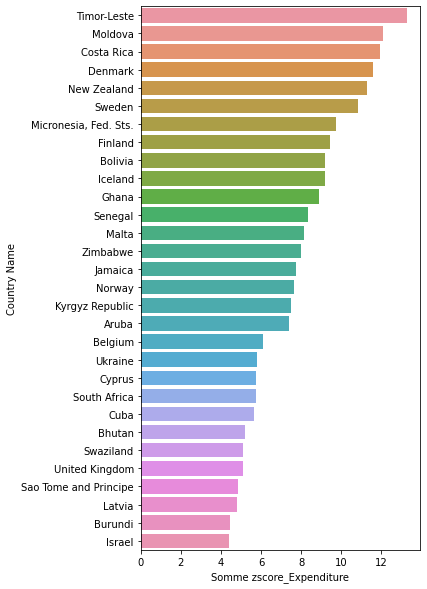

In [47]:
plt.figure(figsize=(5,10))
sns.barplot(x = 'Somme zscore_Expenditure', y = 'Country Name', data = df_depense_etat_education.head(30));

#### 
#### 2. Education
#### 

In [48]:

# Pour l'indice sur l'éducation
# voici la moyenne du taux de remplissage (lignes)

Education = df6.loc[df6['Indicator Name'] == 'Population of the official age for tertiary education, both sexes (number)']
Education['NB_NAN'].mean()


90.33069734004317

In [49]:

# Pour l'indice sur l'éducation
# nous calculon la médiane pour chaque année parmis les années sélectionnées

Education_r = Education.median(axis=0)
Education_r


2010      616571.5
2011      671406.0
2012      659798.0
2013      722185.0
2014      602983.0
2015      669595.0
NB_NAN       100.0
dtype: float64

In [50]:

# Pour l'indice sur l'éducation
# Nous remplissons les valeurs manquantes par la médiane pour chaque années

Education_f = Education.fillna(Education_r)
Education_f


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN
632706,Oman,OMN,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,Oman,Middle East & North Africa,High income: nonOECD,53.846154
434796,Isle of Man,IMN,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,Isle of Man,Europe & Central Asia,High income: nonOECD,53.846154
720666,Sint Maarten (Dutch part),SXM,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,Sint Maarten (Dutch part),Latin America & Caribbean,High income: nonOECD,53.846154
625376,Northern Mariana Islands,MNP,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,Northern Mariana Islands,East Asia & Pacific,High income: nonOECD,53.846154
372491,Greenland,GRL,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,Greenland,Europe & Central Asia,High income: nonOECD,53.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269871,Croatia,HRV,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,274093.0,264662.0,255061.0,245871.0,238785.0,234636.0,Croatia,Europe & Central Asia,High income: nonOECD,100.000000
200236,Bulgaria,BGR,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,494882.0,478429.0,454238.0,426760.0,400214.0,377299.0,Bulgaria,Europe & Central Asia,Upper middle income,100.000000
610716,New Zealand,NZL,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,322637.0,320939.0,321100.0,321910.0,322499.0,321780.0,New Zealand,East Asia & Pacific,High income: OECD,100.000000
376156,Grenada,GRD,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,12283.0,11803.0,11233.0,10767.0,10396.0,10133.0,Grenada,Latin America & Caribbean,Upper middle income,100.000000


In [51]:
Education_f.describe()

,2010,2011,2012,2013,2014,2015,NB_NAN
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,214.000000
mean,2.865181e+06,2.944870e+06,2.924458e+06,2.898325e+06,2.866207e+06,2.482874e+06,90.330697
std,1.213006e+07,1.200509e+07,1.175549e+07,1.146752e+07,1.123801e+07,1.089812e+07,14.784846
min,1.041000e+03,1.448000e+03,1.457000e+03,1.395000e+03,1.042000e+03,2.236000e+03,53.846154
25%,1.751165e+05,3.006812e+05,3.221285e+05,3.425195e+05,1.946758e+05,5.274692e+05,92.307692
50%,6.165715e+05,6.714060e+05,6.597980e+05,7.221850e+05,6.029830e+05,6.695950e+05,100.000000
75%,1.751781e+06,1.630029e+06,1.593199e+06,1.605122e+06,1.962369e+06,9.515482e+05,100.000000
max,1.296427e+08,1.258739e+08,1.198700e+08,1.179364e+08,1.186815e+08,1.194700e+08,100.000000


In [52]:

# Calcul du ZScore pour l'éducation pour chaque année

# ZScore_Education = ( Education_f - Education_f.mean()) / Education_f.std()
# ZScore_Education

Education_f['Education zscore_2010'] = stats.zscore(Education_f['2010'])

Education_f['Education zscore_2011'] = stats.zscore(Education_f['2011'])

Education_f['Education zscore_2012'] = stats.zscore(Education_f['2012'])

Education_f['Education zscore_2013'] = stats.zscore(Education_f['2013'])

Education_f['Education zscore_2014'] = stats.zscore(Education_f['2014'])

Education_f['Education zscore_2015'] = stats.zscore(Education_f['2015'])

Education_f

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN,Education zscore_2010,Education zscore_2011,Education zscore_2012,Education zscore_2013,Education zscore_2014,Education zscore_2015
632706,Oman,OMN,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,Oman,Middle East & North Africa,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775
434796,Isle of Man,IMN,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,Isle of Man,Europe & Central Asia,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775
720666,Sint Maarten (Dutch part),SXM,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,Sint Maarten (Dutch part),Latin America & Caribbean,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775
625376,Northern Mariana Islands,MNP,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,Northern Mariana Islands,East Asia & Pacific,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775
372491,Greenland,GRL,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,Greenland,Europe & Central Asia,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269871,Croatia,HRV,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,274093.0,264662.0,255061.0,245871.0,238785.0,234636.0,Croatia,Europe & Central Asia,High income: nonOECD,100.000000,-0.214110,-0.223779,-0.227609,-0.231844,-0.234346,-0.206780
200236,Bulgaria,BGR,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,494882.0,478429.0,454238.0,426760.0,400214.0,377299.0,Bulgaria,Europe & Central Asia,Upper middle income,100.000000,-0.195865,-0.205931,-0.210626,-0.216033,-0.219948,-0.193658
610716,New Zealand,NZL,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,322637.0,320939.0,321100.0,321910.0,322499.0,321780.0,New Zealand,East Asia & Pacific,High income: OECD,100.000000,-0.210098,-0.219081,-0.221978,-0.225197,-0.226879,-0.198765
376156,Grenada,GRD,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,12283.0,11803.0,11233.0,10767.0,10396.0,10133.0,Grenada,Latin America & Caribbean,Upper middle income,100.000000,-0.235744,-0.244891,-0.248399,-0.252393,-0.254717,-0.227428


In [53]:

# On effectue une somme sur le zscore pour les années 2010, 2011, 2012, 2013, 2014, 2015

Education_f['Somme zscore_Education'] = sum([Education_f['Education zscore_2010'], Education_f['Education zscore_2011'], Education_f['Education zscore_2012'], Education_f['Education zscore_2013'], Education_f['Education zscore_2014'], Education_f['Education zscore_2015']])
Education_f

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,...,Region,Income Group,NB_NAN,Education zscore_2010,Education zscore_2011,Education zscore_2012,Education zscore_2013,Education zscore_2014,Education zscore_2015,Somme zscore_Education
632706,Oman,OMN,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,...,Middle East & North Africa,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775,-1.127575
434796,Isle of Man,IMN,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775,-1.127575
720666,Sint Maarten (Dutch part),SXM,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775,-1.127575
625376,Northern Mariana Islands,MNP,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,...,East Asia & Pacific,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775,-1.127575
372491,Greenland,GRL,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775,-1.127575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
269871,Croatia,HRV,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,274093.0,264662.0,255061.0,245871.0,238785.0,234636.0,...,Europe & Central Asia,High income: nonOECD,100.000000,-0.214110,-0.223779,-0.227609,-0.231844,-0.234346,-0.206780,-1.338468
200236,Bulgaria,BGR,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,494882.0,478429.0,454238.0,426760.0,400214.0,377299.0,...,Europe & Central Asia,Upper middle income,100.000000,-0.195865,-0.205931,-0.210626,-0.216033,-0.219948,-0.193658,-1.242061
610716,New Zealand,NZL,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,322637.0,320939.0,321100.0,321910.0,322499.0,321780.0,...,East Asia & Pacific,High income: OECD,100.000000,-0.210098,-0.219081,-0.221978,-0.225197,-0.226879,-0.198765,-1.301999
376156,Grenada,GRD,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,12283.0,11803.0,11233.0,10767.0,10396.0,10133.0,...,Latin America & Caribbean,Upper middle income,100.000000,-0.235744,-0.244891,-0.248399,-0.252393,-0.254717,-0.227428,-1.463573


In [54]:
# Nous créons une boucle pour récupérer chaque ligne de pays valide dans un nouveau dataframe: df_edu

for pays in Education_f['Country Name']:
    if pays in liste_des_pays_valide:
        df_edu = Education_f.loc[Education_f['Country Name'].isin(liste_des_pays_valide)]
        
df_edu

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,...,Region,Income Group,NB_NAN,Education zscore_2010,Education zscore_2011,Education zscore_2012,Education zscore_2013,Education zscore_2014,Education zscore_2015,Somme zscore_Education
632706,Oman,OMN,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,...,Middle East & North Africa,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775,-1.127575
570401,Monaco,MCO,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775,-1.127575
760981,St. Martin (French part),MAF,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775,-1.127575
181911,Bosnia and Herzegovina,BIH,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,...,Europe & Central Asia,Upper middle income,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775,-1.127575
108611,Andorra,AND,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,616571.5,671406.0,659798.0,722185.0,602983.0,669595.0,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.185810,-0.189819,-0.193099,-0.190210,-0.201862,-0.166775,-1.127575
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673021,Qatar,QAT,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,140613.0,133994.0,155712.0,174096.0,187392.0,191940.0,...,Middle East & North Africa,High income: nonOECD,100.000000,-0.225140,-0.234689,-0.236080,-0.238117,-0.238930,-0.210707,-1.383663
269871,Croatia,HRV,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,274093.0,264662.0,255061.0,245871.0,238785.0,234636.0,...,Europe & Central Asia,High income: nonOECD,100.000000,-0.214110,-0.223779,-0.227609,-0.231844,-0.234346,-0.206780,-1.338468
200236,Bulgaria,BGR,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,494882.0,478429.0,454238.0,426760.0,400214.0,377299.0,...,Europe & Central Asia,Upper middle income,100.000000,-0.195865,-0.205931,-0.210626,-0.216033,-0.219948,-0.193658,-1.242061
610716,New Zealand,NZL,Population of the official age for tertiary ed...,SP.TER.TOTL.IN,322637.0,320939.0,321100.0,321910.0,322499.0,321780.0,...,East Asia & Pacific,High income: OECD,100.000000,-0.210098,-0.219081,-0.221978,-0.225197,-0.226879,-0.198765,-1.301999


In [55]:
df_Education = df_edu.sort_values('Somme zscore_Education', ascending=False)

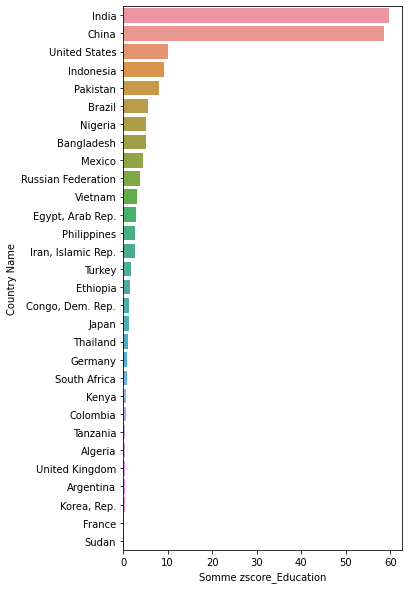

In [56]:
plt.figure(figsize=(5,10))
sns.barplot(x = 'Somme zscore_Education', y = 'Country Name', data = df_Education.head(30));

#### 
#### 3. Démographie
#### 

In [57]:

# Pour l'indice sur la démographie
# voici la moyenne du taux de remplissage (lignes)

Demographie = df6.loc[df6['Indicator Name'] == 'Population, ages 15-24, total']
Demographie['NB_NAN'].mean()


92.88281811646299

In [58]:

# Pour l'indice sur la démographie
# nous calculon la médiane pour chaque année parmis les années sélectionnées

Demographie_r = Demographie.median(axis=0)
Demographie_r


2010      1309299.0
2011      1321838.0
2012      1305029.0
2013      1313021.0
2014      1320960.0
2015      1331040.0
NB_NAN        100.0
dtype: float64

In [59]:

# Pour l'indice sur la démographie
# Nous remplissons les valeurs manquantes par la médiane pour chaque années

Demographie_f = Demographie.fillna(Demographie_r)
Demographie_f


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN
434952,Isle of Man,IMN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,Isle of Man,Europe & Central Asia,High income: nonOECD,53.846154
720822,Sint Maarten (Dutch part),SXM,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,Sint Maarten (Dutch part),Latin America & Caribbean,High income: nonOECD,53.846154
625532,Northern Mariana Islands,MNP,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,Northern Mariana Islands,East Asia & Pacific,High income: nonOECD,53.846154
464272,Kiribati,KIR,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,Kiribati,East Asia & Pacific,Lower middle income,53.846154
372647,Greenland,GRL,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,Greenland,Europe & Central Asia,High income: nonOECD,53.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207722,Burundi,BDI,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1999180.0,2025776.0,2042759.0,2054779.0,2068163.0,2087945.0,Burundi,Sub-Saharan Africa,Low income,100.000000
728152,Slovenia,SVN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,230369.0,222778.0,215373.0,208397.0,202143.0,196812.0,Slovenia,Europe & Central Asia,High income: OECD,100.000000
610872,New Zealand,NZL,"Population, ages 15-24, total",SP.POP.1524.TO.UN,622920.0,624395.0,623857.0,621736.0,618646.0,615099.0,New Zealand,East Asia & Pacific,High income: OECD,100.000000
204057,Burkina Faso,BFA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,3267659.0,3366247.0,3467635.0,3571202.0,3676117.0,3781805.0,Burkina Faso,Sub-Saharan Africa,Low income,100.000000


In [60]:
Demographie_f.describe()

,2010,2011,2012,2013,2014,2015,NB_NAN
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,214.000000
mean,5.856126e+06,5.866617e+06,5.861874e+06,5.853741e+06,5.843106e+06,5.834011e+06,92.882818
std,2.265050e+07,2.263990e+07,2.256807e+07,2.245243e+07,2.231837e+07,2.218370e+07,16.707346
min,1.329900e+04,1.346600e+04,1.370800e+04,1.399000e+04,1.425300e+04,1.445500e+04,53.846154
25%,6.012602e+05,5.946448e+05,5.877575e+05,5.816130e+05,5.718915e+05,5.602152e+05,100.000000
50%,1.309299e+06,1.321838e+06,1.305029e+06,1.313021e+06,1.320960e+06,1.331040e+06,100.000000
75%,3.876185e+06,3.932178e+06,3.987758e+06,4.056986e+06,4.131416e+06,4.200351e+06,100.000000
max,2.350568e+08,2.375485e+08,2.397136e+08,2.415350e+08,2.430027e+08,2.441202e+08,100.000000


In [61]:

# Calcul du ZScore pour la Démographie

# ZScore_Demographie = ( Demographie_f - Demographie_f.mean()) / Demographie_f.std()
# ZScore_Demographie

Demographie_f['Demographie zscore_2010'] = stats.zscore(Demographie_f['2010'])

Demographie_f['Demographie zscore_2011'] = stats.zscore(Demographie_f['2011'])

Demographie_f['Demographie zscore_2012'] = stats.zscore(Demographie_f['2012'])

Demographie_f['Demographie zscore_2013'] = stats.zscore(Demographie_f['2013'])

Demographie_f['Demographie zscore_2014'] = stats.zscore(Demographie_f['2014'])

Demographie_f['Demographie zscore_2015'] = stats.zscore(Demographie_f['2015'])

Demographie_f


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN,Demographie zscore_2010,Demographie zscore_2011,Demographie zscore_2012,Demographie zscore_2013,Demographie zscore_2014,Demographie zscore_2015
434952,Isle of Man,IMN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,Isle of Man,Europe & Central Asia,High income: nonOECD,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462
720822,Sint Maarten (Dutch part),SXM,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,Sint Maarten (Dutch part),Latin America & Caribbean,High income: nonOECD,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462
625532,Northern Mariana Islands,MNP,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,Northern Mariana Islands,East Asia & Pacific,High income: nonOECD,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462
464272,Kiribati,KIR,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,Kiribati,East Asia & Pacific,Lower middle income,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462
372647,Greenland,GRL,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,Greenland,Europe & Central Asia,High income: nonOECD,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207722,Burundi,BDI,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1999180.0,2025776.0,2042759.0,2054779.0,2068163.0,2087945.0,Burundi,Sub-Saharan Africa,Low income,100.000000,-0.170680,-0.170047,-0.169623,-0.169597,-0.169537,-0.169262
728152,Slovenia,SVN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,230369.0,222778.0,215373.0,208397.0,202143.0,196812.0,Slovenia,Europe & Central Asia,High income: OECD,100.000000,-0.248955,-0.249872,-0.250785,-0.252025,-0.253342,-0.254710
610872,New Zealand,NZL,"Population, ages 15-24, total",SP.POP.1524.TO.UN,622920.0,624395.0,623857.0,621736.0,618646.0,615099.0,New Zealand,East Asia & Pacific,High income: OECD,100.000000,-0.231583,-0.232091,-0.232643,-0.233573,-0.234637,-0.235810
204057,Burkina Faso,BFA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,3267659.0,3366247.0,3467635.0,3571202.0,3676117.0,3781805.0,Burkina Faso,Sub-Saharan Africa,Low income,100.000000,-0.114547,-0.110700,-0.106338,-0.101899,-0.097322,-0.092727


In [62]:

# On effectue une somme sur le zscore pour les années 2010, 2011, 2012, 2013, 2014, 2015

Demographie_f['Somme zscore_Demographie'] = sum([Demographie_f['Demographie zscore_2010'], Demographie_f['Demographie zscore_2011'], Demographie_f['Demographie zscore_2012'], Demographie_f['Demographie zscore_2013'], Demographie_f['Demographie zscore_2014'], Demographie_f['Demographie zscore_2015']])
Demographie_f

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,...,Region,Income Group,NB_NAN,Demographie zscore_2010,Demographie zscore_2011,Demographie zscore_2012,Demographie zscore_2013,Demographie zscore_2014,Demographie zscore_2015,Somme zscore_Demographie
434952,Isle of Man,IMN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462,-1.214079
720822,Sint Maarten (Dutch part),SXM,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462,-1.214079
625532,Northern Mariana Islands,MNP,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,...,East Asia & Pacific,High income: nonOECD,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462,-1.214079
464272,Kiribati,KIR,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,...,East Asia & Pacific,Lower middle income,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462,-1.214079
372647,Greenland,GRL,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462,-1.214079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207722,Burundi,BDI,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1999180.0,2025776.0,2042759.0,2054779.0,2068163.0,2087945.0,...,Sub-Saharan Africa,Low income,100.000000,-0.170680,-0.170047,-0.169623,-0.169597,-0.169537,-0.169262,-1.018746
728152,Slovenia,SVN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,230369.0,222778.0,215373.0,208397.0,202143.0,196812.0,...,Europe & Central Asia,High income: OECD,100.000000,-0.248955,-0.249872,-0.250785,-0.252025,-0.253342,-0.254710,-1.509690
610872,New Zealand,NZL,"Population, ages 15-24, total",SP.POP.1524.TO.UN,622920.0,624395.0,623857.0,621736.0,618646.0,615099.0,...,East Asia & Pacific,High income: OECD,100.000000,-0.231583,-0.232091,-0.232643,-0.233573,-0.234637,-0.235810,-1.400337
204057,Burkina Faso,BFA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,3267659.0,3366247.0,3467635.0,3571202.0,3676117.0,3781805.0,...,Sub-Saharan Africa,Low income,100.000000,-0.114547,-0.110700,-0.106338,-0.101899,-0.097322,-0.092727,-0.623533


In [63]:
# Nous créons une boucle pour récupérer chaque ligne de pays valide (uniquement des pays) dans 
# un nouveau dataframe: df_demograph

for pays in Demographie_f['Country Name']:
    if pays in liste_des_pays_valide:
        df_demograph = Demographie_f.loc[Demographie_f['Country Name'].isin(liste_des_pays_valide)]
        
df_demograph

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,...,Region,Income Group,NB_NAN,Demographie zscore_2010,Demographie zscore_2011,Demographie zscore_2012,Demographie zscore_2013,Demographie zscore_2014,Demographie zscore_2015,Somme zscore_Demographie
742812,South Sudan,SSD,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,...,Sub-Saharan Africa,Lower middle income,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462,-1.214079
570557,Monaco,MCO,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462,-1.214079
761137,St. Martin (French part),MAF,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462,-1.214079
753807,St. Kitts and Nevis,KNA,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462,-1.214079
508252,Liechtenstein,LIE,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1309299.0,1321838.0,1305029.0,1313021.0,1320960.0,1331040.0,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.201209,-0.201213,-0.202389,-0.202712,-0.203095,-0.203462,-1.214079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673177,Qatar,QAT,"Population, ages 15-24, total",SP.POP.1524.TO.UN,117679.0,119587.0,121955.0,124579.0,127132.0,129378.0,...,Middle East & North Africa,High income: nonOECD,100.000000,-0.253942,-0.254440,-0.254934,-0.255767,-0.256711,-0.257757,-1.533552
207722,Burundi,BDI,"Population, ages 15-24, total",SP.POP.1524.TO.UN,1999180.0,2025776.0,2042759.0,2054779.0,2068163.0,2087945.0,...,Sub-Saharan Africa,Low income,100.000000,-0.170680,-0.170047,-0.169623,-0.169597,-0.169537,-0.169262,-1.018746
728152,Slovenia,SVN,"Population, ages 15-24, total",SP.POP.1524.TO.UN,230369.0,222778.0,215373.0,208397.0,202143.0,196812.0,...,Europe & Central Asia,High income: OECD,100.000000,-0.248955,-0.249872,-0.250785,-0.252025,-0.253342,-0.254710,-1.509690
610872,New Zealand,NZL,"Population, ages 15-24, total",SP.POP.1524.TO.UN,622920.0,624395.0,623857.0,621736.0,618646.0,615099.0,...,East Asia & Pacific,High income: OECD,100.000000,-0.231583,-0.232091,-0.232643,-0.233573,-0.234637,-0.235810,-1.400337


In [64]:
df_demographie = df_demograph.sort_values('Somme zscore_Demographie', ascending=False)

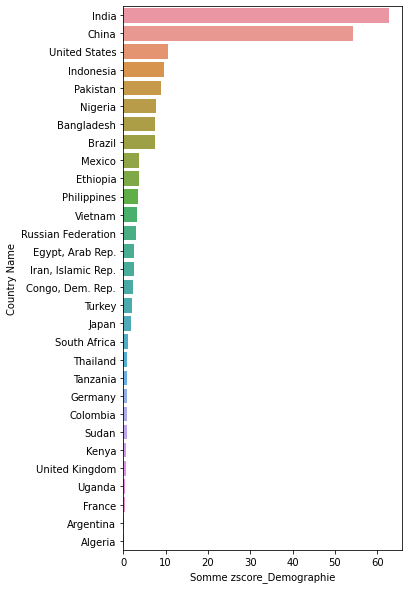

In [65]:
plt.figure(figsize=(5,10))
sns.barplot(x = 'Somme zscore_Demographie', y = 'Country Name', data = df_demographie.head(30));

#### 
#### 4. Economie (1)
#### 

In [66]:

# Pour l'indice sur l'économie (1)
# voici la moyenne du taux de remplissage des données (lignes)

Economie_1 = df6.loc[df6['Indicator Name'] == 'GDP at market prices (current US$)']
Economie_1['NB_NAN'].mean()


96.90869877785767

In [67]:

# Pour l'indice sur l'économie (1)
# nous calculon la médiane pour chaque année parmis les années sélectionnées

Economie_1_r = Economie_1.median(axis=0)
Economie_1_r


2010      2.052329e+10
2011      2.396303e+10
2012      2.569416e+10
2013      2.850568e+10
2014      3.088117e+10
2015      2.703434e+10
NB_NAN    1.000000e+02
dtype: float64

In [68]:

# Pour l'indice sur l'économie (1)
# Nous remplissons les valeurs manquantes par la médiane pour chaque années

Economie_1_f = Economie_1.fillna(Economie_1_r)
Economie_1_f


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN
785553,Syrian Arab Republic,SYR,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,Syrian Arab Republic,Middle East & North Africa,Lower middle income,53.846154
466698,"Korea, Dem. People’s Rep.",PRK,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,Dem. People's Rep. Korea,East Asia & Pacific,Low income,53.846154
342088,French Polynesia,PYF,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,French Polynesia,East Asia & Pacific,High income: nonOECD,53.846154
719583,Sint Maarten (Dutch part),SXM,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,Sint Maarten (Dutch part),Latin America & Caribbean,High income: nonOECD,53.846154
605968,New Caledonia,NCL,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,New Caledonia,East Asia & Pacific,High income: nonOECD,53.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206483,Burundi,BDI,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.026864e+09,2.355652e+09,2.472385e+09,2.714506e+09,3.093647e+09,3.066681e+09,Burundi,Sub-Saharan Africa,Low income,100.000000
268788,Croatia,HRV,GDP at market prices (current US$),NY.GDP.MKTP.CD,5.966543e+10,6.223675e+10,5.648530e+10,5.776987e+10,5.708037e+10,4.892188e+10,Croatia,Europe & Central Asia,High income: nonOECD,100.000000
649948,Paraguay,PRY,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.003053e+10,2.509968e+10,2.459532e+10,2.896591e+10,3.088117e+10,2.728258e+10,Paraguay,Latin America & Caribbean,Lower middle income,100.000000
521673,"Macedonia, FYR",MKD,GDP at market prices (current US$),NY.GDP.MKTP.CD,9.407169e+09,1.049463e+10,9.745251e+09,1.081771e+10,1.136227e+10,1.005166e+10,Macedonia,Europe & Central Asia,Upper middle income,100.000000


In [69]:
Economie_1_f.describe()

,2010,2011,2012,2013,2014,2015,NB_NAN
count,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,2.140000e+02,214.000000
mean,3.066574e+11,3.408278e+11,3.486360e+11,3.584397e+11,3.679600e+11,3.457131e+11,96.908699
std,1.238446e+12,1.331313e+12,1.387689e+12,1.433848e+12,1.497312e+12,1.529748e+12,10.691034
min,3.182352e+07,3.931202e+07,3.987575e+07,3.832236e+07,3.725969e+07,3.267328e+07,53.846154
25%,5.725046e+09,6.250617e+09,7.027829e+09,7.406902e+09,7.991525e+09,6.898729e+09,100.000000
50%,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,100.000000
75%,1.347405e+11,1.666214e+11,1.753535e+11,1.887184e+11,1.961713e+11,1.655661e+11,100.000000
max,1.496437e+13,1.551793e+13,1.615526e+13,1.669152e+13,1.739310e+13,1.812071e+13,100.000000


In [70]:
# Calcul du ZScore pour l'économie (1)

# ZScore_Economie_1 = ( Economie_1_f - Economie_1_f.mean()) / Economie_1_f.std()
# ZScore_Economie_1


Economie_1_f['Economie_1 zscore_2010'] = stats.zscore(Economie_1_f['2010'])

Economie_1_f['Economie_1 zscore_2011'] = stats.zscore(Economie_1_f['2011'])

Economie_1_f['Economie_1 zscore_2012'] = stats.zscore(Economie_1_f['2012'])

Economie_1_f['Economie_1 zscore_2013'] = stats.zscore(Economie_1_f['2013'])

Economie_1_f['Economie_1 zscore_2014'] = stats.zscore(Economie_1_f['2014'])

Economie_1_f['Economie_1 zscore_2015'] = stats.zscore(Economie_1_f['2015'])

Economie_1_f

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN,Economie_1 zscore_2010,Economie_1 zscore_2011,Economie_1 zscore_2012,Economie_1 zscore_2013,Economie_1 zscore_2014,Economie_1 zscore_2015
785553,Syrian Arab Republic,SYR,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,Syrian Arab Republic,Middle East & North Africa,Lower middle income,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809
466698,"Korea, Dem. People’s Rep.",PRK,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,Dem. People's Rep. Korea,East Asia & Pacific,Low income,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809
342088,French Polynesia,PYF,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,French Polynesia,East Asia & Pacific,High income: nonOECD,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809
719583,Sint Maarten (Dutch part),SXM,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,Sint Maarten (Dutch part),Latin America & Caribbean,High income: nonOECD,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809
605968,New Caledonia,NCL,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,New Caledonia,East Asia & Pacific,High income: nonOECD,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206483,Burundi,BDI,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.026864e+09,2.355652e+09,2.472385e+09,2.714506e+09,3.093647e+09,3.066681e+09,Burundi,Sub-Saharan Africa,Low income,100.000000,-0.246555,-0.254835,-0.250038,-0.248673,-0.244252,-0.224514
268788,Croatia,HRV,GDP at market prices (current US$),NY.GDP.MKTP.CD,5.966543e+10,6.223675e+10,5.648530e+10,5.776987e+10,5.708037e+10,4.892188e+10,Croatia,Europe & Central Asia,High income: nonOECD,100.000000,-0.199905,-0.209751,-0.211024,-0.210186,-0.208112,-0.194468
649948,Paraguay,PRY,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.003053e+10,2.509968e+10,2.459532e+10,2.896591e+10,3.088117e+10,2.728258e+10,Paraguay,Latin America & Caribbean,Lower middle income,100.000000,-0.231983,-0.237712,-0.234059,-0.230322,-0.225651,-0.208647
521673,"Macedonia, FYR",MKD,GDP at market prices (current US$),NY.GDP.MKTP.CD,9.407169e+09,1.049463e+10,9.745251e+09,1.081771e+10,1.136227e+10,1.005166e+10,Macedonia,Europe & Central Asia,Upper middle income,100.000000,-0.240581,-0.248708,-0.244785,-0.243008,-0.238717,-0.219937


In [71]:

# On effectue une somme sur le zscore pour les années 2010, 2011, 2012, 2013, 2014, 2015

Economie_1_f['Somme zscore_Economie_1'] = sum([Economie_1_f['Economie_1 zscore_2010'], Economie_1_f['Economie_1 zscore_2011'], Economie_1_f['Economie_1 zscore_2012'], Economie_1_f['Economie_1 zscore_2013'], Economie_1_f['Economie_1 zscore_2014'], Economie_1_f['Economie_1 zscore_2015']])
Economie_1_f

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,...,Region,Income Group,NB_NAN,Economie_1 zscore_2010,Economie_1 zscore_2011,Economie_1 zscore_2012,Economie_1 zscore_2013,Economie_1 zscore_2014,Economie_1 zscore_2015,Somme zscore_Economie_1
785553,Syrian Arab Republic,SYR,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,...,Middle East & North Africa,Lower middle income,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809,-1.368520
466698,"Korea, Dem. People’s Rep.",PRK,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,...,East Asia & Pacific,Low income,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809,-1.368520
342088,French Polynesia,PYF,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,...,East Asia & Pacific,High income: nonOECD,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809,-1.368520
719583,Sint Maarten (Dutch part),SXM,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809,-1.368520
605968,New Caledonia,NCL,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,...,East Asia & Pacific,High income: nonOECD,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809,-1.368520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206483,Burundi,BDI,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.026864e+09,2.355652e+09,2.472385e+09,2.714506e+09,3.093647e+09,3.066681e+09,...,Sub-Saharan Africa,Low income,100.000000,-0.246555,-0.254835,-0.250038,-0.248673,-0.244252,-0.224514,-1.468868
268788,Croatia,HRV,GDP at market prices (current US$),NY.GDP.MKTP.CD,5.966543e+10,6.223675e+10,5.648530e+10,5.776987e+10,5.708037e+10,4.892188e+10,...,Europe & Central Asia,High income: nonOECD,100.000000,-0.199905,-0.209751,-0.211024,-0.210186,-0.208112,-0.194468,-1.233446
649948,Paraguay,PRY,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.003053e+10,2.509968e+10,2.459532e+10,2.896591e+10,3.088117e+10,2.728258e+10,...,Latin America & Caribbean,Lower middle income,100.000000,-0.231983,-0.237712,-0.234059,-0.230322,-0.225651,-0.208647,-1.368372
521673,"Macedonia, FYR",MKD,GDP at market prices (current US$),NY.GDP.MKTP.CD,9.407169e+09,1.049463e+10,9.745251e+09,1.081771e+10,1.136227e+10,1.005166e+10,...,Europe & Central Asia,Upper middle income,100.000000,-0.240581,-0.248708,-0.244785,-0.243008,-0.238717,-0.219937,-1.435737


In [72]:
# Nous créons une boucle pour récupérer chaque ligne de pays valide dans un nouveau dataframe: df_eco_1

for pays in Economie_1_f['Country Name']:
    if pays in liste_des_pays_valide:
        df_eco_1 = Economie_1_f.loc[Economie_1_f['Country Name'].isin(liste_des_pays_valide)]
        
df_eco_1

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,...,Region,Income Group,NB_NAN,Economie_1 zscore_2010,Economie_1 zscore_2011,Economie_1 zscore_2012,Economie_1 zscore_2013,Economie_1 zscore_2014,Economie_1 zscore_2015,Somme zscore_Economie_1
759898,St. Martin (French part),MAF,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809,-1.368520
825868,Turks and Caicos Islands,TCA,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809,-1.368520
224808,Cayman Islands,CYM,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809,-1.368520
235803,Channel Islands,CHI,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809,-1.368520
276118,Curacao,CUW,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.052329e+10,2.396303e+10,2.569416e+10,2.850568e+10,3.088117e+10,2.703434e+10,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.231584,-0.238567,-0.233265,-0.230643,-0.225651,-0.208809,-1.368520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206483,Burundi,BDI,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.026864e+09,2.355652e+09,2.472385e+09,2.714506e+09,3.093647e+09,3.066681e+09,...,Sub-Saharan Africa,Low income,100.000000,-0.246555,-0.254835,-0.250038,-0.248673,-0.244252,-0.224514,-1.468868
268788,Croatia,HRV,GDP at market prices (current US$),NY.GDP.MKTP.CD,5.966543e+10,6.223675e+10,5.648530e+10,5.776987e+10,5.708037e+10,4.892188e+10,...,Europe & Central Asia,High income: nonOECD,100.000000,-0.199905,-0.209751,-0.211024,-0.210186,-0.208112,-0.194468,-1.233446
649948,Paraguay,PRY,GDP at market prices (current US$),NY.GDP.MKTP.CD,2.003053e+10,2.509968e+10,2.459532e+10,2.896591e+10,3.088117e+10,2.728258e+10,...,Latin America & Caribbean,Lower middle income,100.000000,-0.231983,-0.237712,-0.234059,-0.230322,-0.225651,-0.208647,-1.368372
521673,"Macedonia, FYR",MKD,GDP at market prices (current US$),NY.GDP.MKTP.CD,9.407169e+09,1.049463e+10,9.745251e+09,1.081771e+10,1.136227e+10,1.005166e+10,...,Europe & Central Asia,Upper middle income,100.000000,-0.240581,-0.248708,-0.244785,-0.243008,-0.238717,-0.219937,-1.435737


In [73]:
df_Economie_1 = df_eco_1.sort_values('Somme zscore_Economie_1', ascending=False)

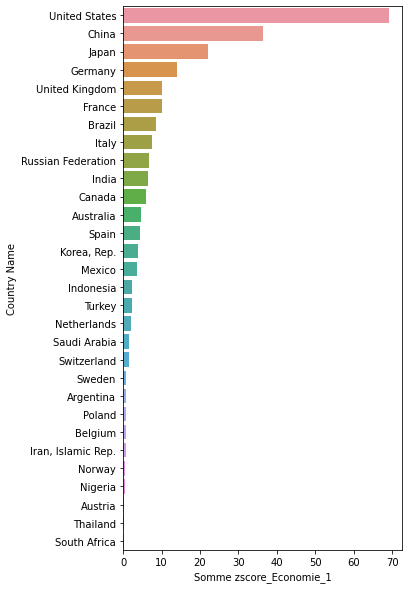

In [74]:
plt.figure(figsize=(5,10))
sns.barplot(x = 'Somme zscore_Economie_1', y = 'Country Name', data = df_Economie_1.head(30));

#### 
#### 5. Economie (2)
#### 

In [75]:

# Pour l'indice sur l'économie (2)
# voici la moyenne du taux de remplissage des données (lignes)

Economie_2 = df6.loc[df6['Indicator Name'] == 'GNI per capita, Atlas method (current US$)']
Economie_2['NB_NAN'].mean()


94.28468727534148

In [76]:

# Pour l'indice sur l'économie (2)
# nous calculon la médiane pour chaque année parmis les années sélectionnées

Economie_2_r = Economie_2.median(axis=0)
Economie_2_r


2010      4445.0
2011      4890.0
2012      5520.0
2013      5830.0
2014      5745.0
2015      5540.0
NB_NAN     100.0
dtype: float64

In [77]:

# Pour l'indice sur l'économie (2)
# Nous remplissons les valeurs manquantes par la médiane pour chaque années

Economie_2_f = Economie_2.fillna(Economie_2_r)
Economie_2_f


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN
785561,Syrian Arab Republic,SYR,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,Syrian Arab Republic,Middle East & North Africa,Lower middle income,53.846154
624301,Northern Mariana Islands,MNP,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,Northern Mariana Islands,East Asia & Pacific,High income: nonOECD,53.846154
466706,"Korea, Dem. People’s Rep.",PRK,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,Dem. People's Rep. Korea,East Asia & Pacific,Low income,53.846154
371416,Greenland,GRL,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,Greenland,Europe & Central Asia,High income: nonOECD,53.846154
342096,French Polynesia,PYF,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,French Polynesia,East Asia & Pacific,High income: nonOECD,53.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206491,Burundi,BDI,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,210.0,230.0,260.0,280.0,290.0,280.0,Burundi,Sub-Saharan Africa,Low income,100.000000
268796,Croatia,HRV,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,13750.0,14050.0,13460.0,13470.0,13150.0,12810.0,Croatia,Europe & Central Asia,High income: nonOECD,100.000000
521681,"Macedonia, FYR",MKD,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4700.0,4810.0,4740.0,5000.0,5200.0,5100.0,Macedonia,Europe & Central Asia,Upper middle income,100.000000
818546,Turkey,TUR,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,10430.0,11230.0,11880.0,12530.0,12590.0,12000.0,Turkey,Europe & Central Asia,Upper middle income,100.000000


In [78]:
Economie_2_f.describe()

,2010,2011,2012,2013,2014,2015,NB_NAN
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,12080.327103,12497.710280,13162.149533,13748.551402,13274.158879,12702.710280,94.284687
std,18213.256339,18547.700967,19254.167308,20004.383986,19029.039934,17915.249128,14.595741
min,210.000000,230.000000,260.000000,280.000000,290.000000,280.000000,53.846154
25%,1827.500000,2010.000000,2300.000000,2507.500000,2847.500000,2425.000000,100.000000
50%,4445.000000,4890.000000,5520.000000,5830.000000,5745.000000,5540.000000,100.000000
75%,12272.500000,12285.000000,13427.500000,13602.500000,13382.500000,12840.000000,100.000000
max,110440.000000,107530.000000,106080.000000,106140.000000,104860.000000,93860.000000,100.000000


In [79]:
# Calcul du ZScore pour l'économie (2)

# ZScore_Economie_2 = ( Economie_2_f - Economie_2_f.mean()) / Economie_2_f.std()
# ZScore_Economie_2

Economie_2_f['Economie_2 zscore_2010'] = stats.zscore(Economie_2_f['2010'])

Economie_2_f['Economie_2 zscore_2011'] = stats.zscore(Economie_2_f['2011'])

Economie_2_f['Economie_2 zscore_2012'] = stats.zscore(Economie_2_f['2012'])

Economie_2_f['Economie_2 zscore_2013'] = stats.zscore(Economie_2_f['2013'])

Economie_2_f['Economie_2 zscore_2014'] = stats.zscore(Economie_2_f['2014'])

Economie_2_f['Economie_2 zscore_2015'] = stats.zscore(Economie_2_f['2015'])

Economie_2_f

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN,Economie_2 zscore_2010,Economie_2 zscore_2011,Economie_2 zscore_2012,Economie_2 zscore_2013,Economie_2 zscore_2014,Economie_2 zscore_2015
785561,Syrian Arab Republic,SYR,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,Syrian Arab Republic,Middle East & North Africa,Lower middle income,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748
624301,Northern Mariana Islands,MNP,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,Northern Mariana Islands,East Asia & Pacific,High income: nonOECD,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748
466706,"Korea, Dem. People’s Rep.",PRK,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,Dem. People's Rep. Korea,East Asia & Pacific,Low income,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748
371416,Greenland,GRL,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,Greenland,Europe & Central Asia,High income: nonOECD,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748
342096,French Polynesia,PYF,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,French Polynesia,East Asia & Pacific,High income: nonOECD,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206491,Burundi,BDI,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,210.0,230.0,260.0,280.0,290.0,280.0,Burundi,Sub-Saharan Africa,Low income,100.000000,-0.653269,-0.662965,-0.671668,-0.674859,-0.683934,-0.695041
268796,Croatia,HRV,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,13750.0,14050.0,13460.0,13470.0,13150.0,12810.0,Croatia,Europe & Central Asia,High income: nonOECD,100.000000,0.091888,0.083888,0.015506,-0.013957,-0.006540,0.006003
521681,"Macedonia, FYR",MKD,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4700.0,4810.0,4740.0,5000.0,5200.0,5100.0,Macedonia,Europe & Central Asia,Upper middle income,100.000000,-0.406167,-0.415455,-0.438445,-0.438357,-0.425302,-0.425366
818546,Turkey,TUR,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,10430.0,11230.0,11880.0,12530.0,12590.0,12000.0,Turkey,Europe & Central Asia,Upper middle income,100.000000,-0.090824,-0.068509,-0.066747,-0.061057,-0.036038,-0.039316


In [80]:

# On effectue une somme sur le zscore pour les années 2010, 2011, 2012, 2013, 2014, 2015

Economie_2_f['Somme zscore_Economie_2'] = sum([Economie_2_f['Economie_2 zscore_2010'], Economie_2_f['Economie_2 zscore_2011'], Economie_2_f['Economie_2 zscore_2012'], Economie_2_f['Economie_2 zscore_2013'], Economie_2_f['Economie_2 zscore_2014'], Economie_2_f['Economie_2 zscore_2015']])
Economie_2_f

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,...,Region,Income Group,NB_NAN,Economie_2 zscore_2010,Economie_2 zscore_2011,Economie_2 zscore_2012,Economie_2 zscore_2013,Economie_2 zscore_2014,Economie_2 zscore_2015,Somme zscore_Economie_2
785561,Syrian Arab Republic,SYR,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,...,Middle East & North Africa,Lower middle income,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748,-2.423284
624301,Northern Mariana Islands,MNP,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,...,East Asia & Pacific,High income: nonOECD,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748,-2.423284
466706,"Korea, Dem. People’s Rep.",PRK,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,...,East Asia & Pacific,Low income,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748,-2.423284
371416,Greenland,GRL,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748,-2.423284
342096,French Polynesia,PYF,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,...,East Asia & Pacific,High income: nonOECD,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748,-2.423284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206491,Burundi,BDI,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,210.0,230.0,260.0,280.0,290.0,280.0,...,Sub-Saharan Africa,Low income,100.000000,-0.653269,-0.662965,-0.671668,-0.674859,-0.683934,-0.695041,-4.041735
268796,Croatia,HRV,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,13750.0,14050.0,13460.0,13470.0,13150.0,12810.0,...,Europe & Central Asia,High income: nonOECD,100.000000,0.091888,0.083888,0.015506,-0.013957,-0.006540,0.006003,0.176788
521681,"Macedonia, FYR",MKD,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4700.0,4810.0,4740.0,5000.0,5200.0,5100.0,...,Europe & Central Asia,Upper middle income,100.000000,-0.406167,-0.415455,-0.438445,-0.438357,-0.425302,-0.425366,-2.549093
818546,Turkey,TUR,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,10430.0,11230.0,11880.0,12530.0,12590.0,12000.0,...,Europe & Central Asia,Upper middle income,100.000000,-0.090824,-0.068509,-0.066747,-0.061057,-0.036038,-0.039316,-0.362490


In [81]:
# Nous créons une boucle pour récupérer chaque ligne de pays valide dans un nouveau dataframe: df_eco_2

for pays in Economie_2_f['Country Name']:
    if pays in liste_des_pays_valide:
        df_eco_2 = Economie_2_f.loc[Economie_2_f['Country Name'].isin(liste_des_pays_valide)]
        
df_eco_2

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,...,Region,Income Group,NB_NAN,Economie_2 zscore_2010,Economie_2 zscore_2011,Economie_2 zscore_2012,Economie_2 zscore_2013,Economie_2 zscore_2014,Economie_2 zscore_2015,Somme zscore_Economie_2
569326,Monaco,MCO,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748,-2.423284
759906,St. Martin (French part),MAF,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748,-2.423284
507021,Liechtenstein,LIE,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748,-2.423284
103871,American Samoa,ASM,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,...,East Asia & Pacific,Upper middle income,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748,-2.423284
107536,Andorra,AND,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4445.0,4890.0,5520.0,5830.0,5745.0,5540.0,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.420201,-0.411132,-0.397839,-0.396769,-0.396594,-0.400748,-2.423284
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206491,Burundi,BDI,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,210.0,230.0,260.0,280.0,290.0,280.0,...,Sub-Saharan Africa,Low income,100.000000,-0.653269,-0.662965,-0.671668,-0.674859,-0.683934,-0.695041,-4.041735
268796,Croatia,HRV,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,13750.0,14050.0,13460.0,13470.0,13150.0,12810.0,...,Europe & Central Asia,High income: nonOECD,100.000000,0.091888,0.083888,0.015506,-0.013957,-0.006540,0.006003,0.176788
521681,"Macedonia, FYR",MKD,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,4700.0,4810.0,4740.0,5000.0,5200.0,5100.0,...,Europe & Central Asia,Upper middle income,100.000000,-0.406167,-0.415455,-0.438445,-0.438357,-0.425302,-0.425366,-2.549093
818546,Turkey,TUR,"GNI per capita, Atlas method (current US$)",NY.GNP.PCAP.CD,10430.0,11230.0,11880.0,12530.0,12590.0,12000.0,...,Europe & Central Asia,Upper middle income,100.000000,-0.090824,-0.068509,-0.066747,-0.061057,-0.036038,-0.039316,-0.362490


In [82]:
df_Economie_2 = df_eco_2.sort_values('Somme zscore_Economie_2', ascending=False)

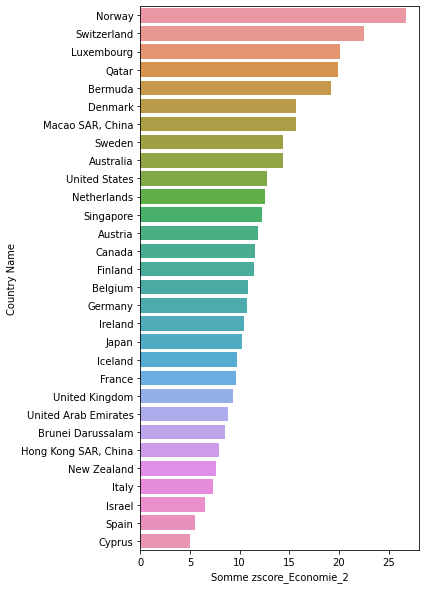

In [83]:
plt.figure(figsize=(5,10))
sns.barplot(x = 'Somme zscore_Economie_2', y = 'Country Name', data = df_Economie_2.head(30));

#### 
#### 6. L'usage d'internet
#### 

In [84]:

# Pour l'usage d'internet
# voici la moyenne du taux de remplissage des données (lignes)

Utilisateur_internet = df6.loc[df6['Indicator Name'] == 'Internet users (per 100 people)']
Utilisateur_internet['NB_NAN'].mean()

97.26815240833933

In [85]:

# Pour l'usage d'internet
# nous calculon la médiane pour chaque année parmis les années sélectionnées

Utilisateur_internet_r = Utilisateur_internet.median(axis=0)
Utilisateur_internet_r


2010       30.00
2011       34.95
2012       37.50
2013       43.30
2014       46.20
2015       50.30
NB_NAN    100.00
dtype: float64

In [86]:

# Pour l'usage d'internet
# Nous remplissons les valeurs manquantes par la médiane pour chaque années

Utilisateur_internet_f = Utilisateur_internet.fillna(Utilisateur_internet_r)
Utilisateur_internet_f


,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN
433845,Isle of Man,IMN,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,Isle of Man,Europe & Central Asia,High income: nonOECD,53.846154
624425,Northern Mariana Islands,MNP,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,Northern Mariana Islands,East Asia & Pacific,High income: nonOECD,53.846154
639085,Palau,PLW,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,Palau,East Asia & Pacific,Upper middle income,53.846154
719715,Sint Maarten (Dutch part),SXM,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,Sint Maarten (Dutch part),Latin America & Caribbean,High income: nonOECD,53.846154
741705,South Sudan,SSD,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,South Sudan,Sub-Saharan Africa,Lower middle income,53.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206615,Burundi,BDI,Internet users (per 100 people),IT.NET.USER.P2,1.00,1.110000,1.220000,1.264218,1.38,4.866224,Burundi,Sub-Saharan Africa,Low income,100.000000
672070,Qatar,QAT,Internet users (per 100 people),IT.NET.USER.P2,69.00,69.000000,69.300000,85.300000,91.49,92.884826,Qatar,Middle East & North Africa,High income: nonOECD,100.000000
268920,Croatia,HRV,Internet users (per 100 people),IT.NET.USER.P2,56.55,57.789979,61.939973,66.747600,68.57,69.803100,Croatia,Europe & Central Asia,High income: nonOECD,100.000000
367875,Greece,GRC,Internet users (per 100 people),IT.NET.USER.P2,44.40,51.649995,55.069993,59.866300,63.21,66.835000,Greece,Europe & Central Asia,High income: OECD,100.000000


In [87]:
Utilisateur_internet_f.describe()

,2010,2011,2012,2013,2014,2015,NB_NAN
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,33.857550,36.737193,39.754699,42.881611,45.815777,48.877746,97.268152
std,26.573658,27.173607,27.714341,28.075842,27.943484,27.659691,10.607166
min,0.000000,0.000000,0.000000,0.900000,0.990000,1.083733,53.846154
25%,9.400000,10.902725,13.073100,15.425000,18.895000,22.449258,100.000000
50%,30.000000,34.950000,37.500000,43.300000,46.200000,50.300000,100.000000
75%,52.997500,56.525000,61.294946,65.713700,69.145000,71.631425,100.000000
max,93.390000,94.819687,96.209800,96.546800,98.160000,98.323610,100.000000


In [88]:
# Calcul du ZScore pour l'usage d'internet

# ZScore_UInternet = ( Utilisateur_internet_f - Utilisateur_internet_f.mean()) / Utilisateur_internet_f.std()
# ZScore_UInternet

Utilisateur_internet_f['Utilisateur_internet zscore_2010'] = stats.zscore(Utilisateur_internet_f['2010'])

Utilisateur_internet_f['Utilisateur_internet zscore_2011'] = stats.zscore(Utilisateur_internet_f['2011'])

Utilisateur_internet_f['Utilisateur_internet zscore_2012'] = stats.zscore(Utilisateur_internet_f['2012'])

Utilisateur_internet_f['Utilisateur_internet zscore_2013'] = stats.zscore(Utilisateur_internet_f['2013'])

Utilisateur_internet_f['Utilisateur_internet zscore_2014'] = stats.zscore(Utilisateur_internet_f['2014'])

Utilisateur_internet_f['Utilisateur_internet zscore_2015'] = stats.zscore(Utilisateur_internet_f['2015'])

Utilisateur_internet_f





,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,Short Name,Region,Income Group,NB_NAN,Utilisateur_internet zscore_2010,Utilisateur_internet zscore_2011,Utilisateur_internet zscore_2012,Utilisateur_internet zscore_2013,Utilisateur_internet zscore_2014,Utilisateur_internet zscore_2015
433845,Isle of Man,IMN,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,Isle of Man,Europe & Central Asia,High income: nonOECD,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540
624425,Northern Mariana Islands,MNP,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,Northern Mariana Islands,East Asia & Pacific,High income: nonOECD,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540
639085,Palau,PLW,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,Palau,East Asia & Pacific,Upper middle income,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540
719715,Sint Maarten (Dutch part),SXM,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,Sint Maarten (Dutch part),Latin America & Caribbean,High income: nonOECD,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540
741705,South Sudan,SSD,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,South Sudan,Sub-Saharan Africa,Lower middle income,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206615,Burundi,BDI,Internet users (per 100 people),IT.NET.USER.P2,1.00,1.110000,1.220000,1.264218,1.38,4.866224,Burundi,Sub-Saharan Africa,Low income,100.000000,-1.239370,-1.314170,-1.393685,-1.485796,-1.593930,-1.594910
672070,Qatar,QAT,Internet users (per 100 people),IT.NET.USER.P2,69.00,69.000000,69.300000,85.300000,91.49,92.884826,Qatar,Middle East & North Africa,High income: nonOECD,100.000000,1.325555,1.190068,1.068565,1.514393,1.638354,1.594749
268920,Croatia,HRV,Internet users (per 100 people),IT.NET.USER.P2,56.55,57.789979,61.939973,66.747600,68.57,69.803100,Croatia,Europe & Central Asia,High income: nonOECD,100.000000,0.855947,0.776568,0.802375,0.852047,0.816204,0.758303
367875,Greece,GRC,Internet users (per 100 people),IT.NET.USER.P2,44.40,51.649995,55.069993,59.866300,63.21,66.835000,Greece,Europe & Central Asia,High income: OECD,100.000000,0.397656,0.550084,0.553908,0.606376,0.623938,0.650743


In [89]:

# On effectue une somme sur le zscore pour les années 2010, 2011, 2012, 2013, 2014, 2015

Utilisateur_internet_f['Somme zscore_Utilisateur_internet'] = sum([Utilisateur_internet_f['Utilisateur_internet zscore_2010'], Utilisateur_internet_f['Utilisateur_internet zscore_2011'], Utilisateur_internet_f['Utilisateur_internet zscore_2012'], Utilisateur_internet_f['Utilisateur_internet zscore_2013'], Utilisateur_internet_f['Utilisateur_internet zscore_2014'], Utilisateur_internet_f['Utilisateur_internet zscore_2015']])
Utilisateur_internet_f

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,...,Region,Income Group,NB_NAN,Utilisateur_internet zscore_2010,Utilisateur_internet zscore_2011,Utilisateur_internet zscore_2012,Utilisateur_internet zscore_2013,Utilisateur_internet zscore_2014,Utilisateur_internet zscore_2015,Somme zscore_Utilisateur_internet
433845,Isle of Man,IMN,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540,-0.212715
624425,Northern Mariana Islands,MNP,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,...,East Asia & Pacific,High income: nonOECD,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540,-0.212715
639085,Palau,PLW,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,...,East Asia & Pacific,Upper middle income,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540,-0.212715
719715,Sint Maarten (Dutch part),SXM,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540,-0.212715
741705,South Sudan,SSD,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,...,Sub-Saharan Africa,Lower middle income,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540,-0.212715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206615,Burundi,BDI,Internet users (per 100 people),IT.NET.USER.P2,1.00,1.110000,1.220000,1.264218,1.38,4.866224,...,Sub-Saharan Africa,Low income,100.000000,-1.239370,-1.314170,-1.393685,-1.485796,-1.593930,-1.594910,-8.621860
672070,Qatar,QAT,Internet users (per 100 people),IT.NET.USER.P2,69.00,69.000000,69.300000,85.300000,91.49,92.884826,...,Middle East & North Africa,High income: nonOECD,100.000000,1.325555,1.190068,1.068565,1.514393,1.638354,1.594749,8.331684
268920,Croatia,HRV,Internet users (per 100 people),IT.NET.USER.P2,56.55,57.789979,61.939973,66.747600,68.57,69.803100,...,Europe & Central Asia,High income: nonOECD,100.000000,0.855947,0.776568,0.802375,0.852047,0.816204,0.758303,4.861444
367875,Greece,GRC,Internet users (per 100 people),IT.NET.USER.P2,44.40,51.649995,55.069993,59.866300,63.21,66.835000,...,Europe & Central Asia,High income: OECD,100.000000,0.397656,0.550084,0.553908,0.606376,0.623938,0.650743,3.382705


In [90]:
# Nous créons une boucle pour récupérer chaque ligne de pays valide dans un nouveau dataframe: df_utilisateur_int

for pays in Utilisateur_internet_f['Country Name']:
    if pays in liste_des_pays_valide:
        df_utilisateur_int = Utilisateur_internet_f.loc[Utilisateur_internet_f['Country Name'].isin(liste_des_pays_valide)]
        
df_utilisateur_int

,Country Name,Country Code,Indicator Name,Indicator Code,2010,2011,2012,2013,2014,2015,...,Region,Income Group,NB_NAN,Utilisateur_internet zscore_2010,Utilisateur_internet zscore_2011,Utilisateur_internet zscore_2012,Utilisateur_internet zscore_2013,Utilisateur_internet zscore_2014,Utilisateur_internet zscore_2015,Somme zscore_Utilisateur_internet
741705,South Sudan,SSD,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,...,Sub-Saharan Africa,Lower middle income,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540,-0.212715
760030,St. Martin (French part),MAF,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540,-0.212715
103995,American Samoa,ASM,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,...,East Asia & Pacific,Upper middle income,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540,-0.212715
826000,Turks and Caicos Islands,TCA,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,...,Latin America & Caribbean,High income: nonOECD,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540,-0.212715
235935,Channel Islands,CHI,Internet users (per 100 people),IT.NET.USER.P2,30.00,34.950000,37.500000,43.300000,46.20,50.300000,...,Europe & Central Asia,High income: nonOECD,53.846154,-0.145505,-0.065924,-0.081546,0.014937,0.013782,0.051540,-0.212715
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
855320,Uzbekistan,UZB,Internet users (per 100 people),IT.NET.USER.P2,15.90,18.600000,23.600000,26.800000,35.50,42.800000,...,Europe & Central Asia,Lower middle income,100.000000,-0.677350,-0.669021,-0.584267,-0.574135,-0.370031,-0.220248,-3.095052
206615,Burundi,BDI,Internet users (per 100 people),IT.NET.USER.P2,1.00,1.110000,1.220000,1.264218,1.38,4.866224,...,Sub-Saharan Africa,Low income,100.000000,-1.239370,-1.314170,-1.393685,-1.485796,-1.593930,-1.594910,-8.621860
672070,Qatar,QAT,Internet users (per 100 people),IT.NET.USER.P2,69.00,69.000000,69.300000,85.300000,91.49,92.884826,...,Middle East & North Africa,High income: nonOECD,100.000000,1.325555,1.190068,1.068565,1.514393,1.638354,1.594749,8.331684
268920,Croatia,HRV,Internet users (per 100 people),IT.NET.USER.P2,56.55,57.789979,61.939973,66.747600,68.57,69.803100,...,Europe & Central Asia,High income: nonOECD,100.000000,0.855947,0.776568,0.802375,0.852047,0.816204,0.758303,4.861444


In [91]:
df_Utilisateur_internet = df_utilisateur_int.sort_values('Somme zscore_Utilisateur_internet', ascending=False)


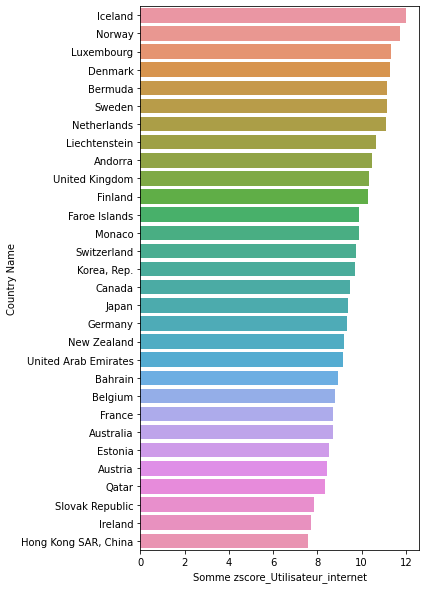

In [92]:
plt.figure(figsize=(5,10))
sns.barplot(x = 'Somme zscore_Utilisateur_internet', y = 'Country Name', data = df_Utilisateur_internet.head(30));